In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


C:\Users\USER\AppData\Local\Temp\ipykernel_312\1192671192.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [75]:
df = pd.read_csv("African_crises_dataset.csv")
df

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [76]:
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [78]:
df.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [79]:
df.duplicated().sum()

0

In [7]:
profile = ProfileReport(df, title='African Crises Dataset Report', explorative=True)
profile.to_file("African_crises_dataset.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

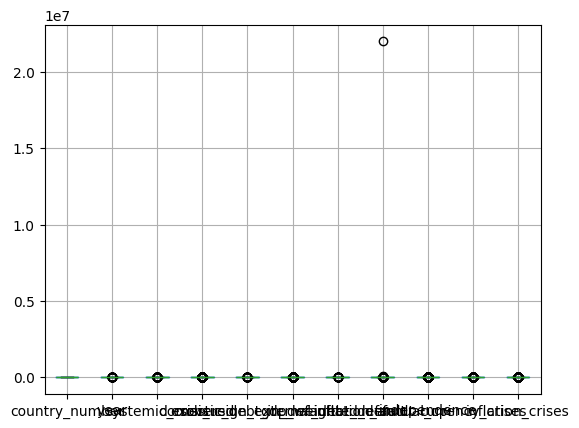

In [80]:
df.boxplot()
plt.show()

In [81]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

<Axes: >

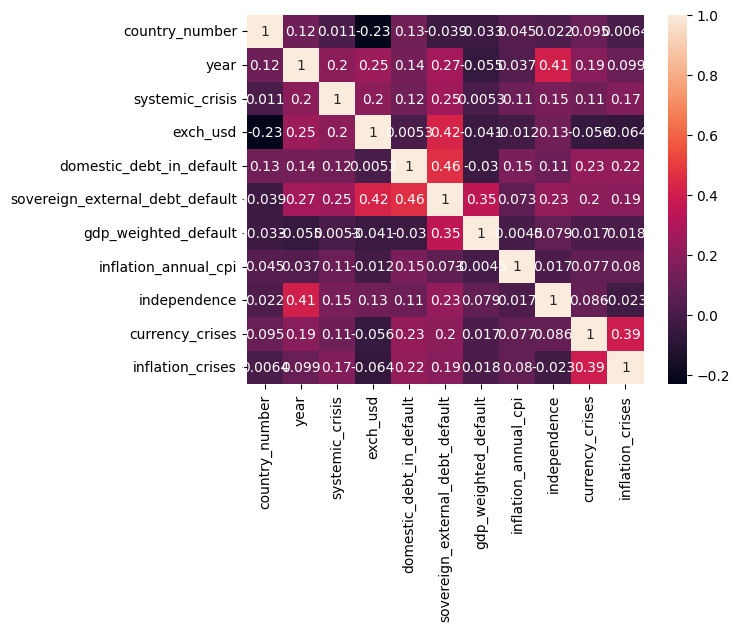

In [82]:
sns.heatmap(df[numerical_features].corr(), annot= True)

In [83]:
df.select_dtypes(include=['object'])

,country_code,country,banking_crisis
0,DZA,Algeria,crisis
1,DZA,Algeria,no_crisis
2,DZA,Algeria,no_crisis
3,DZA,Algeria,no_crisis
4,DZA,Algeria,no_crisis
...,...,...,...
1054,ZWE,Zimbabwe,crisis
1055,ZWE,Zimbabwe,no_crisis
1056,ZWE,Zimbabwe,no_crisis
1057,ZWE,Zimbabwe,no_crisis


In [84]:
le = LabelEncoder()
df["country_code"] = le.fit_transform(df["country_code"])
df["country"] = le.fit_transform(df["country"])
df["banking_crisis"] = le.fit_transform(df["banking_crisis"])

In [85]:
df

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,3,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,3,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,3,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,3,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,12,12,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,0
1055,70,12,12,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,1
1056,70,12,12,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,1
1057,70,12,12,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,1


<Axes: >

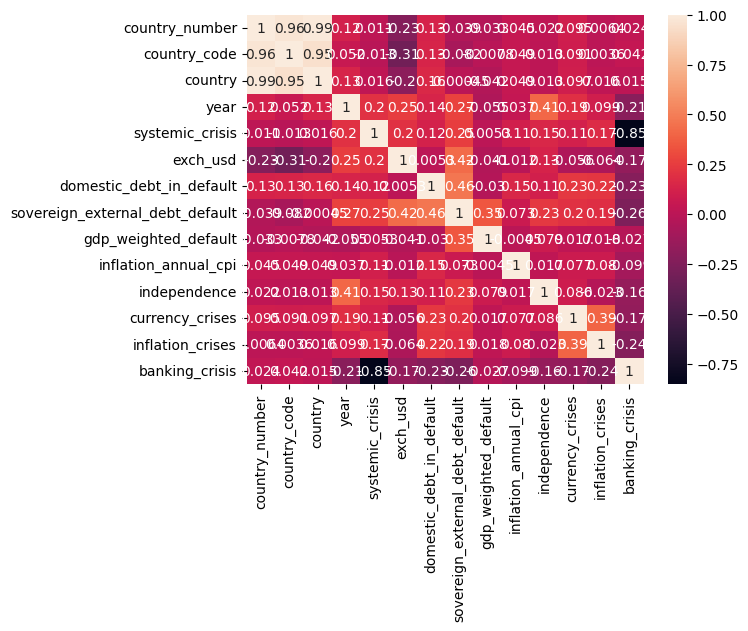

In [86]:
sns.heatmap(df.corr(), annot= True)

In [87]:
df_work = df.drop(columns=['domestic_debt_in_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises'])

In [88]:
df_work

,country_number,country_code,country,year,systemic_crisis,exch_usd,sovereign_external_debt_default,banking_crisis
0,1,3,0,1870,1,0.052264,0,0
1,1,3,0,1871,0,0.052798,0,1
2,1,3,0,1872,0,0.052274,0,1
3,1,3,0,1873,0,0.051680,0,1
4,1,3,0,1874,0,0.051308,0,1
...,...,...,...,...,...,...,...,...
1054,70,12,12,2009,1,354.800000,1,0
1055,70,12,12,2010,0,378.200000,1,1
1056,70,12,12,2011,0,361.900000,1,1
1057,70,12,12,2012,0,361.900000,1,1


In [66]:
df_work = pd.DataFrame(df_workk, columns=df.drop(columns=['domestic_debt_in_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises']).columns)

In [73]:
df_work

,country_number,country_code,country,year,systemic_crisis,exch_usd,sovereign_external_debt_default,banking_crisis
0,1,3,0,1870,1,0.052264,0,0
1,1,3,0,1871,0,0.052798,0,1
2,1,3,0,1872,0,0.052274,0,1
3,1,3,0,1873,0,0.051680,0,1
4,1,3,0,1874,0,0.051308,0,1
...,...,...,...,...,...,...,...,...
1054,70,12,12,2009,1,354.800000,1,0
1055,70,12,12,2010,0,378.200000,1,1
1056,70,12,12,2011,0,361.900000,1,1
1057,70,12,12,2012,0,361.900000,1,1


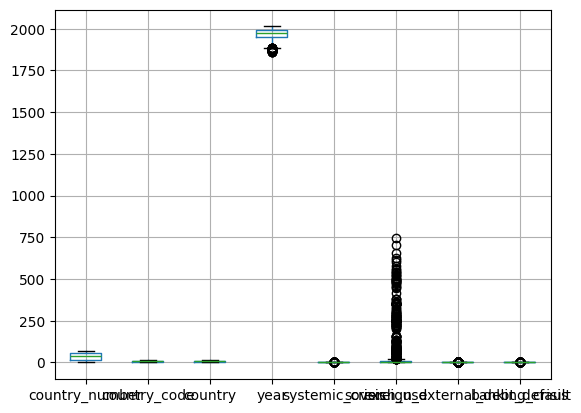

In [90]:
df_work.boxplot()
plt.show()

In [92]:
df_work.corr()

,country_number,country_code,country,year,systemic_crisis,exch_usd,sovereign_external_debt_default,banking_crisis
country_number,1.000000,0.964105,0.990553,0.115574,0.010991,-0.231976,-0.039262,0.023652
country_code,0.964105,1.000000,0.946147,0.051679,-0.012692,-0.312222,-0.082447,0.041981
country,0.990553,0.946147,1.000000,0.134990,0.015586,-0.198953,-0.000455,0.014667
year,0.115574,0.051679,0.134990,1.000000,0.197450,0.248757,0.271890,-0.213774
systemic_crisis,0.010991,-0.012692,0.015586,0.197450,1.000000,0.202687,0.249850,-0.853702
exch_usd,-0.231976,-0.312222,-0.198953,0.248757,0.202687,1.000000,0.422890,-0.168775
sovereign_external_debt_default,-0.039262,-0.082447,-0.000455,0.271890,0.249850,0.422890,1.000000,-0.263992
banking_crisis,0.023652,0.041981,0.014667,-0.213774,-0.853702,-0.168775,-0.263992,1.000000


<Axes: >

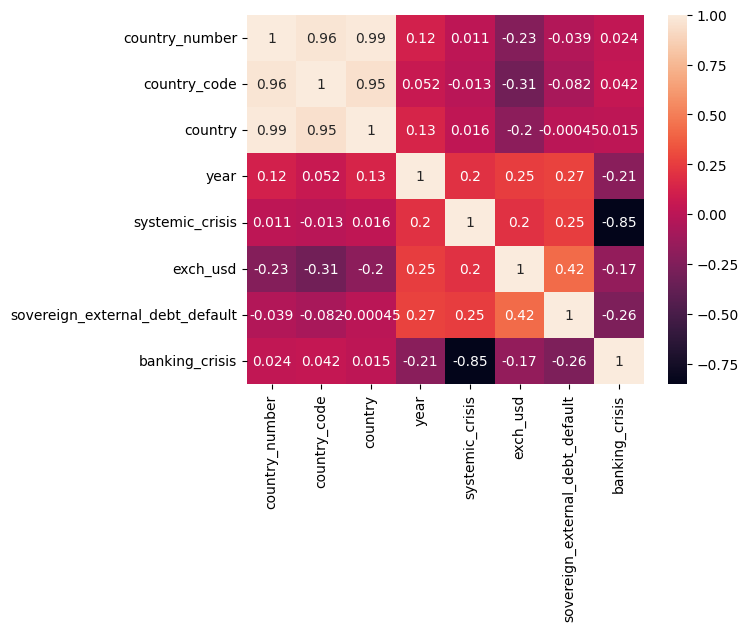

In [93]:
sns.heatmap(df_work.corr(), annot= True)

In [94]:
X = df.drop(columns=['systemic_crisis'])
y = df['systemic_crisis']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [97]:
y_pred = model.predict(X_test)
y_pred

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.93, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.78, 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.89, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.78, 0.  , 0.  , 0.97, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.71, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.07, 0.  , 0.  , 0.  ,
       0.15, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.27, 0.  , 0.  , 0.  , 0.79, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.87, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.27, 0.  , 0.  , 0.  , 0.97, 0.

In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.01589622641509434
MSE: 0.004719339622641509
R² Score: 0.9360162895927602
